In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Visualize relationships between weather varialbles and resultant solar radiation values. Create and compare predictive models.

In [2]:
#load dataset from csv file and view header and first lines
#original as-imported dataset is called solar
solar = pd.read_csv('solar.csv')
print('solar dataset')
solar.info()
solar.describe()

solar dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 8 columns):
no          35136 non-null int64
time        35136 non-null int64
airtemp     35136 non-null float64
humidity    35136 non-null float64
dewpoint    35136 non-null float64
barpress    35136 non-null float64
wind        35136 non-null float64
srad        35136 non-null float64
dtypes: float64(6), int64(2)
memory usage: 2.1 MB


,no,time,airtemp,humidity,dewpoint,barpress,wind,srad
count,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000
mean,17568.500000,1197.500000,16.582108,69.784386,10.263975,101.971642,2.158207,182.197669
std,10143.033866,692.973004,8.570097,21.050079,9.685072,0.553103,1.171899,264.007618
min,1.000000,15.000000,-8.580000,10.000000,-21.720000,99.960000,0.450000,3.480000
25%,8784.750000,611.250000,10.190000,54.300000,2.150000,101.650000,1.280000,4.160000
50%,17568.500000,1207.500000,18.450000,73.900000,13.260000,101.970000,1.990000,7.840000
75%,26352.250000,1803.750000,22.850000,88.400000,18.670000,102.270000,2.850000,306.100000
max,35136.000000,2400.000000,34.340000,98.900000,23.590000,103.810000,8.630000,1089.000000


This dataset consists of sequential observations of solar radiation (srad) along with weather variables marked by number (no) and time (time). The observations include air temperature, humidity, dewpoint, barometric pressure and wind speed. There are over 35,000 observartions made every 15 minutes with no missing values. The time code ranges from 15 (15 minutes after midnight) to 2400 (midnight).

Basic visualizations of the dataset

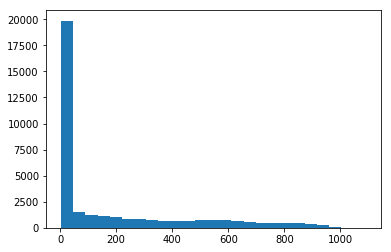

In [3]:
plt.hist(solar['srad'],bins=25)
plt.show()

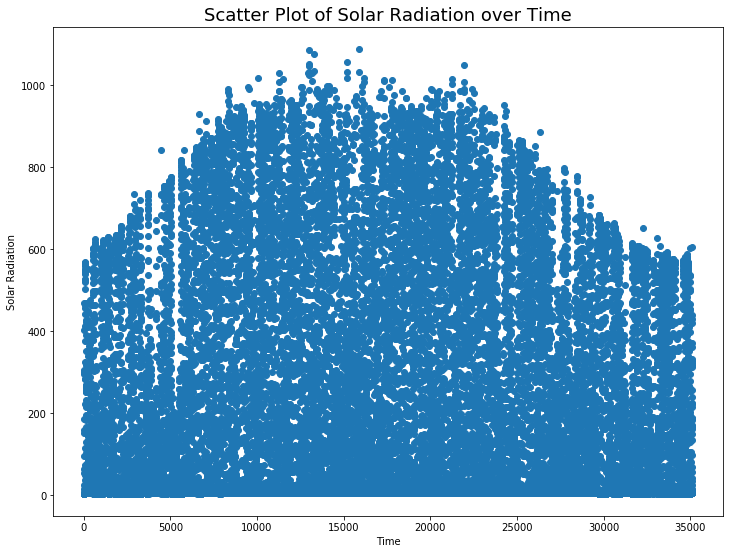

In [4]:
#Scatter plot showing solar radiation and time
plt.figure(figsize=(12,9))
time=(solar['no'])
srad=(solar['srad'])
plt.title('Scatter Plot of Solar Radiation over Time',fontsize=18)
plt.xlabel('Time')
plt.ylabel('Solar Radiation')
plt.scatter (time,srad)
plt.show()

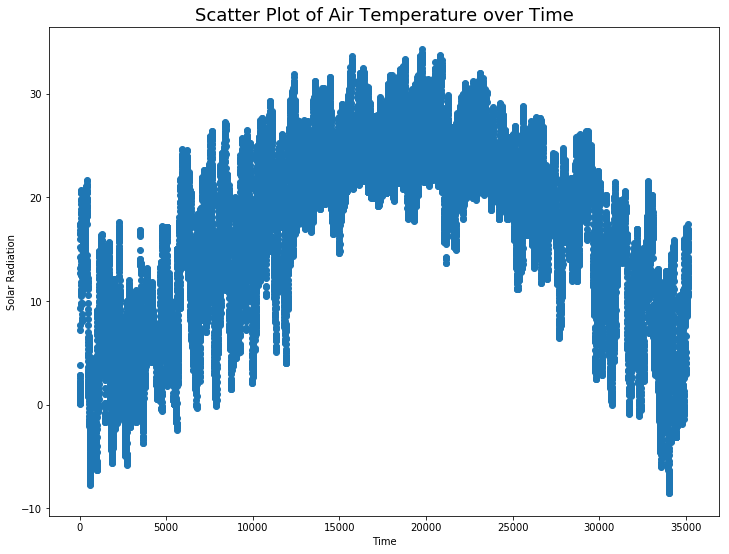

In [5]:
#Scatter plot showing air temperature and time
plt.figure(figsize=(12,9))
time=(solar['no'])
temp=(solar['airtemp'])
plt.title('Scatter Plot of Air Temperature over Time',fontsize=18)
plt.xlabel('Time')
plt.ylabel('Solar Radiation')
plt.scatter (time,temp)
plt.show()

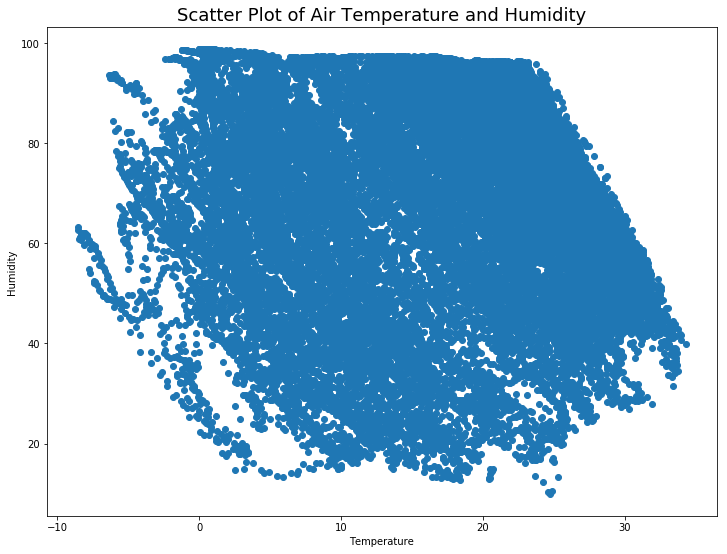

In [6]:
#Scatter plot showing air temperature and humidity
plt.figure(figsize=(12,9))
hum=(solar['humidity'])
temp=(solar['airtemp'])
plt.title('Scatter Plot of Air Temperature and Humidity',fontsize=18)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.scatter (temp,hum)
plt.show()

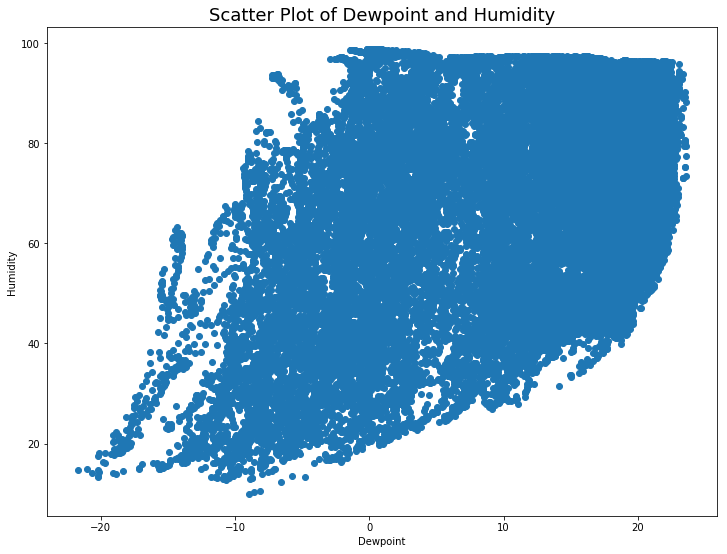

In [7]:
#Scatter plot showing dewpoint and humidity
plt.figure(figsize=(12,9))
hum=(solar['humidity'])
dp=(solar['dewpoint'])
plt.title('Scatter Plot of Dewpoint and Humidity',fontsize=18)
plt.xlabel('Dewpoint')
plt.ylabel('Humidity')
plt.scatter (dp,hum)
plt.show()

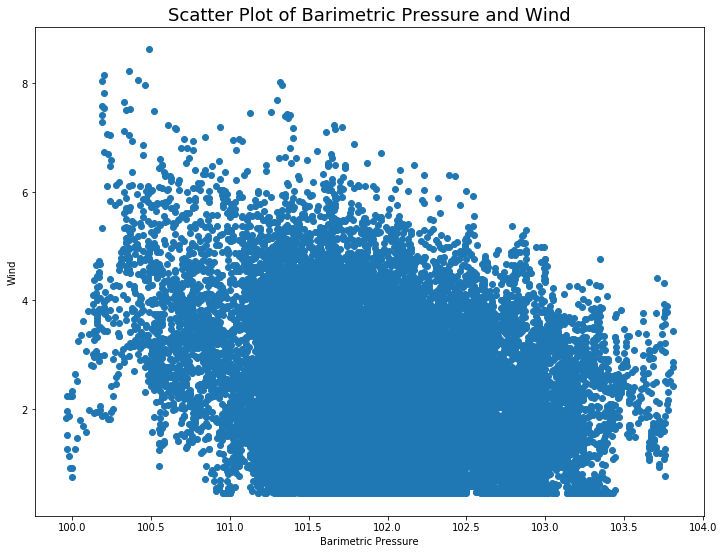

In [8]:
#Scatter plot showing pressure and wind
plt.figure(figsize=(12,9))
bp=(solar['barpress'])
wind=(solar['wind'])
plt.title('Scatter Plot of Barimetric Pressure and Wind',fontsize=18)
plt.xlabel('Barimetric Pressure')
plt.ylabel('Wind')
plt.scatter (bp,wind)
plt.show()

In order to evaluate solar radiation only while the sun is up, a second dataset can be created with the overnight values removed. The hours around dawn and dusk will also result in different radiation (null) results than those through the peak of the day. So for simplicity, and to make modeling straightforward, data will be extracted four hours before noon (8:00am) through six hours after noon (18:00). This technique will cut much of the data, but retain most of the highest solar radiation values and provide a dataset to evaluate and compare relationships between the variables.

In [9]:
#create a new dataframe of observations during daylight hours only
#daysr = extract times between 800 and 1800
daysr = solar[(solar.time>799)&(solar.time<1800)]
daysr.describe()

,no,time,airtemp,humidity,dewpoint,barpress,wind,srad
count,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000
mean,17571.500000,1272.500000,19.049355,60.063839,10.151842,101.998175,2.711433,415.429854
std,10143.204666,287.727136,8.523720,21.063029,9.876073,0.563828,1.089144,267.934358
min,32.000000,800.000000,-8.480000,10.000000,-21.720000,99.960000,0.450000,4.160000
25%,8787.750000,1026.250000,13.100000,44.400000,1.890000,101.660000,1.930000,178.975000
50%,17571.500000,1272.500000,21.050000,60.000000,13.140000,102.000000,2.560000,397.150000
75%,26355.250000,1518.750000,25.790000,76.700000,18.650000,102.320000,3.370000,623.025000
max,35111.000000,1745.000000,34.340000,98.800000,23.550000,103.810000,8.630000,1089.000000


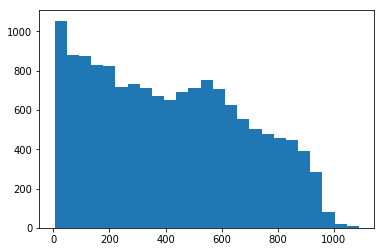

In [10]:
plt.hist(daysr['srad'],bins=25)
plt.show()

This histogram shows that the dataset is now a more accurate description of solar radiation during peak daylight hours (4 hours before, and 5 hours after noon). While there are still a number of solar radiation observations around zero, there are now more represented at greater values compared to the full dataset with overnight weather variable observations. The meadian, for instance, is now around 400 compared with only almost 8 in the dataset with overnight observations.

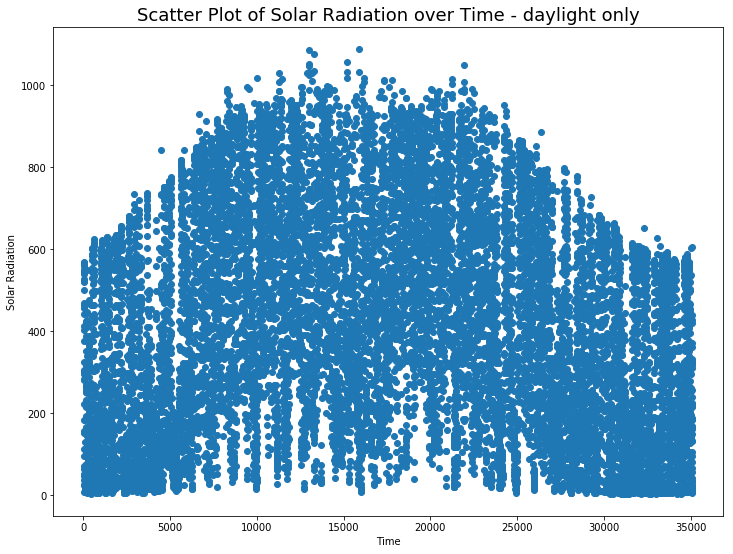

In [11]:
#Scatter plot showing solar radiation and time
plt.figure(figsize=(12,9))
time=(daysr['no'])
srad=(daysr['srad'])
plt.title('Scatter Plot of Solar Radiation over Time - daylight only',fontsize=18)
plt.xlabel('Time')
plt.ylabel('Solar Radiation')
plt.scatter (time,srad)
plt.show()

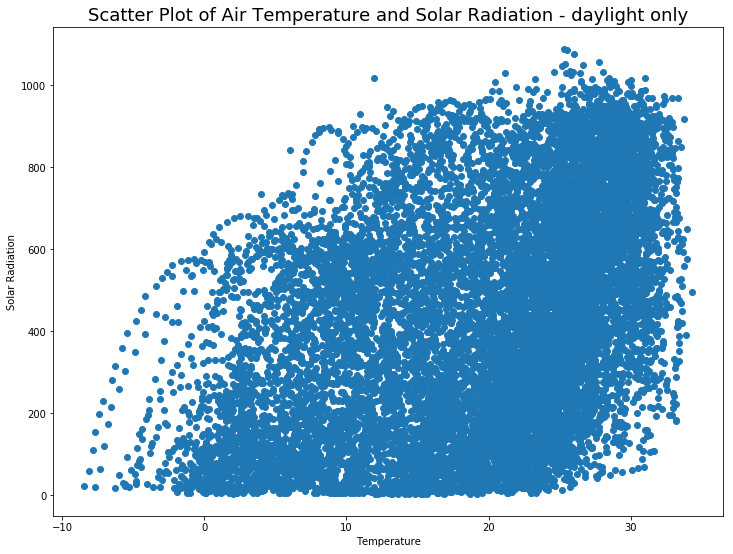

In [12]:
#Scatter plot showing air temperature and humidity
plt.figure(figsize=(12,9))
srad=(daysr['srad'])
temp=(daysr['airtemp'])
plt.title('Scatter Plot of Air Temperature and Solar Radiation - daylight only',fontsize=18)
plt.xlabel('Temperature')
plt.ylabel('Solar Radiation')
plt.scatter (temp,srad)
plt.show()

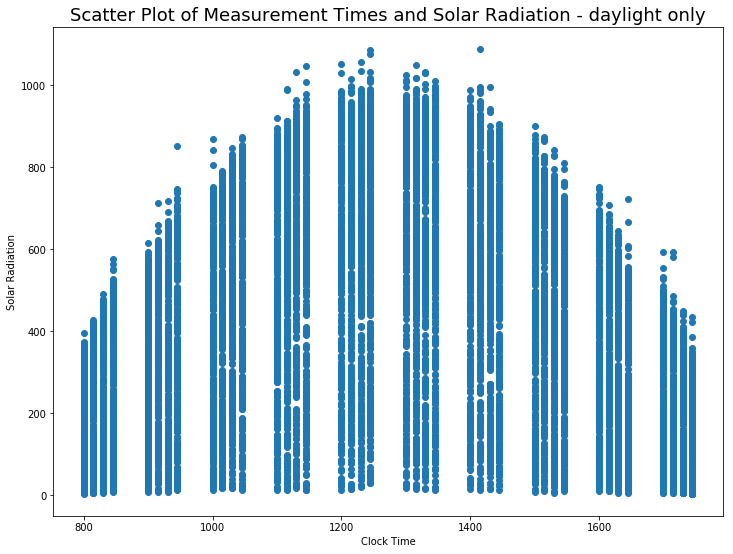

In [13]:
#Scatter plot showing air temperature and humidity
plt.figure(figsize=(12,9))
srad=(daysr['srad'])
time=(daysr['time'])
plt.title('Scatter Plot of Measurement Times and Solar Radiation - daylight only',fontsize=18)
plt.xlabel('Clock Time')
plt.ylabel('Solar Radiation')
plt.scatter (time,srad)
plt.show()

This plot clearly shows that solar radiation ranges can reach maximum only at the noon hour, and maxima at other times of the day are lower, further away from the noon hour (either earlier in the morning or later in the evening). Also, values can range between low and high values at any time during the day (meaning the lowest values near zero are observed any time between 8:00 and 17:00). However, solar radiation maximum values (at 1000 or greater) basically only occur around the noon hour. There are a few outliers observed at 9:45am, again at 10:00, 14:15, 17:00 and 17:15 that do not fit in well with the rest of the set. That's not to say these are not correct observations - conditions may have been ideal for high solar radiation during these times. Graphically, however, these few high points show up on this otherwise fairly well behaved plot of the data.

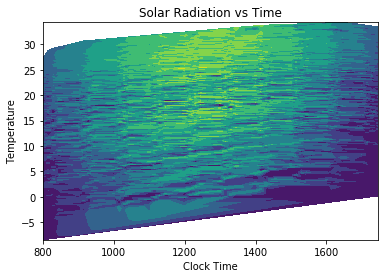

In [14]:
#heatmap of time and air temperature
fig, (ax)=plt.subplots()
ax.set_title("Solar Radiation vs Time")
plt.xlabel('Clock Time')
plt.ylabel('Temperature')
ax.tricontourf(daysr["time"], daysr["airtemp"], daysr["srad"])
plt.show()

The heatmap shows, not surprisingly, that solar radiation is lowest in the early morning and late evening when air temperatures are low and greatest around noon (as previously established) but are highest when the temperature is also high.

In [15]:
#prepare to model the solar radiation variable
#remove sequence number and time, keep weather variables and solar radiation values
days=daysr.iloc[:,[2,3,4,5,6,7]]

In [16]:
#bin solar radiation data into 10 levels
bins = [0,100,200,300,400,500,600,700,800,900,1100]
names = ['1', '2', '3','4','5','6','7','8','9','10']
days.loc[:,'srad'] = pd.cut(days.srad, bins, labels=names)
days.info()
days.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 31 to 35110
Data columns (total 6 columns):
airtemp     14640 non-null float64
humidity    14640 non-null float64
dewpoint    14640 non-null float64
barpress    14640 non-null float64
wind        14640 non-null float64
srad        14640 non-null category
dtypes: category(1), float64(5)
memory usage: 700.9 KB


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,airtemp,humidity,dewpoint,barpress,wind,srad
31,1.207,78.9,-2.04,102.99,0.56,1
32,1.644,78.7,-1.66,103.00,0.45,1
33,2.111,76.0,-1.68,103.00,0.66,1
34,2.906,74.5,-1.19,103.01,0.59,1
35,3.801,74.4,-0.31,103.00,0.45,2


In [17]:
#import modules 
from math import sqrt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
#features = days.iloc[:,0:4]
#features.head()

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X=days[['airtemp', 'humidity', 'dewpoint', 'barpress']]  # Features
y=days['srad']  # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [20]:
#set dependent variable 
#solar radiation levels 1 through 10
#depVar = days['srad']

In [21]:
#create training set
#X_train = (features[:10248])
#X_train.head(10)

In [22]:
#Training set
#y_train = depVar[:10248]
#y_train_count = len(y_train.index)
#print('The number of observations in the Y training set are:',str(y_train_count))
#print(y_train.head(10))

In [23]:
#Test set
#X_test = features[-4392:]
#X_test_count = len(X_test.index)
#print('The number of observations in the feature testing set is:',str(X_test_count))
#print(X_test.head())

In [24]:
#Ground truth
#y_test = depVar[:-4392]
#y_test_count = len(y_test.index)
#print('The number of observations in the Y testing set are:',str(y_test_count))
#y_test.head()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [26]:
X_train.shape, X_test.shape

((7686, 4), (2562, 4))

In [27]:
#Define then run models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelNB = GaussianNB()
modelKNN = KNeighborsClassifier()

In [28]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
modelNB.fit(X_train,y_train)

GaussianNB(priors=None)

In [31]:
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
#Calculate accuracy of models
print(cross_val_score(modelRF, X_train, y_train))

[0.5584972  0.51181198 0.53697637]


In [33]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[0.4792854  0.43238704 0.4598964 ]


In [34]:
print(cross_val_score(modelNB, X_train, y_train)) 

[0.23967264 0.23106948 0.2365129 ]


In [35]:
print(cross_val_score(modelKNN, X_train, y_train)) 

[0.24902572 0.2431694  0.25097733]


In [36]:
#Model Fitting
modelRF.score(X_train,y_train)

0.9233633079355403

In [37]:
modelSVR.score(X_train,y_train)

0.5770396056077887

In [38]:
modelNB.score(X_train,y_train)

0.234192037470726

In [39]:
modelKNN.score(X_train,y_train)

0.48972157168878483

In [40]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.603
RMSE: 1.701


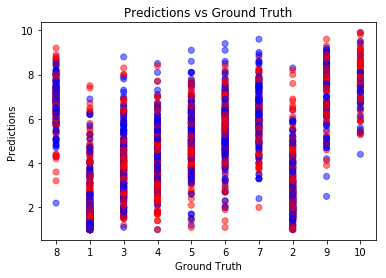

In [41]:
plt.scatter(y_test, predictions, color=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.show();

The best model results (random forest) show only slightly better than a 50/50 chance of predicting the solar radiation level based on weather factors. There are wide spreads at every level from 1 to 10, with little indication of improved accuracy at high, middle or low levels.